In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from imblearn.pipeline import Pipeline
from joblib import dump,load
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/balanced_dataset.csv")

X = dataset["cleaned_tweet"].values
y = dataset["dialect"].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=2022)

print("Size of training set: {}".format(X_train.shape[0]))
print("Size of testing set: {}".format(X_test.shape[0]))

Size of training set: 164763
Size of testing set: 1665


In [5]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
xtrain_cv = count_vectorizer.fit_transform(X_train)
xtest_cv = count_vectorizer.transform(X_test)

tfv = TfidfTransformer()
xtrain_tfv = tfv.fit_transform(xtrain_cv)
xtest_tfv = tfv.transform(xtest_cv)

In [6]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    print("Accuracy score on training set: ", accuracy_score(y_train, train_predictions))
    print("Accuracy score on test set: ", accuracy_score(y_test, test_predictions))
    print()
    print('\t\t\t\tCLASSIFICATIION METRICS\n')
    print(classification_report(y_test, test_predictions, 
                                target_names= dataset["dialect"].unique()))
    print()
    conf_mat = confusion_matrix(y_test, test_predictions)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
                xticklabels=dataset["dialect"].unique(), 
                yticklabels=dataset["dialect"].unique())
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("CONFUSION MATRIX - {}\n".format(model.__class__.__name__), size=16);
    

Accuracy score on training set:  0.9667522441324812
Accuracy score on test set:  0.4984984984984985

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

          IQ       0.44      0.33      0.38        94
          LY       0.48      0.33      0.39        92
          QA       0.57      0.53      0.55       106
          PL       0.38      0.74      0.50        69
          SY       0.55      0.72      0.63        98
          TN       0.35      0.35      0.35        93
          JO       0.40      0.34      0.37        94
          MA       0.55      0.74      0.63        94
          SA       0.58      0.74      0.65        72
          YE       0.60      0.76      0.67       104
          DZ       0.37      0.37      0.37        86
          EG       0.47      0.23      0.31       104
          LB       0.51      0.45      0.48       100
          KW       0.49      0.44      0.46        95
          OM       0.53      0.77      0.63        95
     

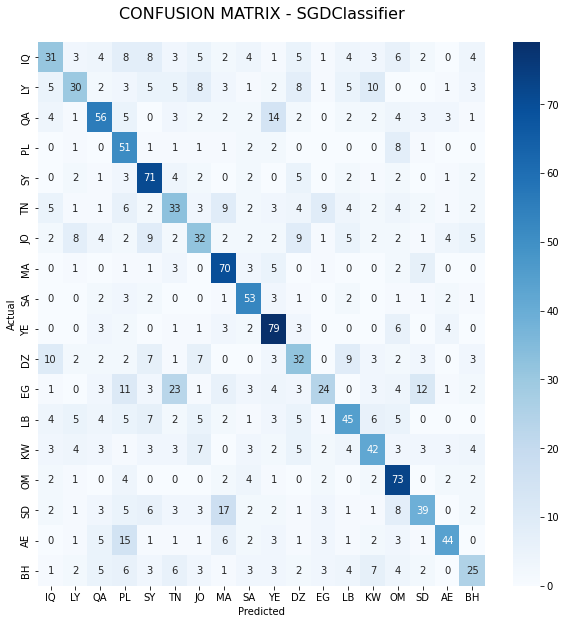

In [7]:
# Model 01 
SGD = SGDClassifier()
SGD.fit(xtrain_tfv, y_train)
model_evaluation(SGD, xtrain_tfv, y_train, xtest_tfv, y_test)

In [8]:
# Check 01
checker = dataset.sample(5)
sentences = list(checker.cleaned_tweet)
labels = list(checker.dialect)

predicted_labels = SGD.predict(count_vectorizer.transform(sentences))

for i, sentence in enumerate(sentences):
  print("tweet: ", sentence)
  print("predicted label: ", predicted_labels[i])
  print("true label: ", labels[i])

tweet:  دا شنو دا رصاص فعلا
predicted label:  SD
true label:  SD
tweet:  العذبوه مبلكني ثاني يوم سكرنا الشبك الزبال
predicted label:  SA
true label:  SA
tweet:  اسحب كلاامي الله ياابو شعععر طويلللل
predicted label:  DZ
true label:  DZ
tweet:  انت مسلوع مايمشيش الحال خش صاله
predicted label:  LY
true label:  LY
tweet:  هههههههانا راني نستني النتايج تاع السوتنونس بلاصه مانستني النتايج تاع ولادي
predicted label:  DZ
true label:  DZ


Accuracy score on training set:  0.9526349969349914
Accuracy score on test set:  0.5321321321321322

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

          IQ       0.42      0.44      0.43        94
          LY       0.45      0.40      0.43        92
          QA       0.50      0.56      0.53       106
          PL       0.42      0.86      0.56        69
          SY       0.67      0.68      0.68        98
          TN       0.43      0.41      0.42        93
          JO       0.44      0.39      0.42        94
          MA       0.65      0.76      0.70        94
          SA       0.68      0.72      0.70        72
          YE       0.71      0.74      0.73       104
          DZ       0.33      0.29      0.31        86
          EG       0.47      0.37      0.41       104
          LB       0.48      0.50      0.49       100
          KW       0.48      0.52      0.50        95
          OM       0.66      0.77      0.71        95
     

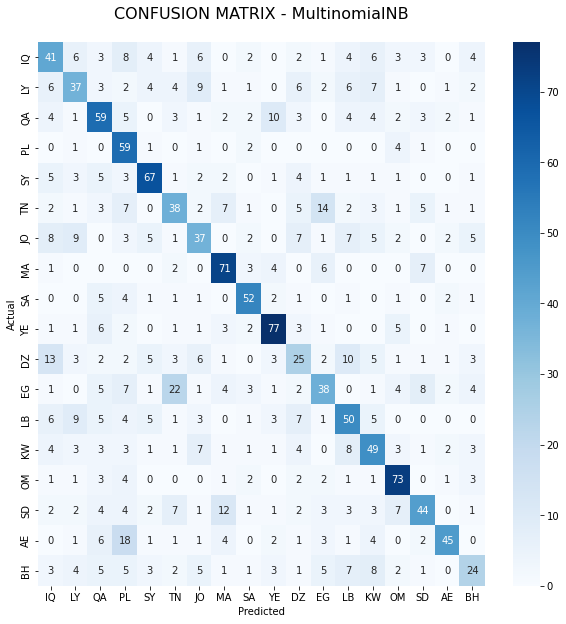

In [9]:
# Model 02
NB = MultinomialNB()
NB.fit(xtrain_tfv, y_train)
model_evaluation(NB, xtrain_tfv, y_train, xtest_tfv, y_test)

In [10]:
# Check 02
checker = dataset.sample(5)
sentences = list(checker.cleaned_tweet)
labels = list(checker.dialect)

predicted_labels = NB.predict(count_vectorizer.transform(sentences))

for i, sentence in enumerate(sentences):
  print("tweet: ", sentence)
  print("predicted label: ", predicted_labels[i])
  print("true label: ", labels[i])

tweet:  جاي ودك اقبل اعذارك ايش عيد اسمع عيد مدري وش تقول حوبتي
predicted label:  SA
true label:  LY
tweet:  ربي يعيشك حبيبتي ربي يسعد ايامك
predicted label:  DZ
true label:  DZ
tweet:  ههههههههههههههههههه ولله ياحوده جاي لبن كاطو كافي مالقيتش
predicted label:  LY
true label:  LY
tweet:  ذووقك والله مرسي لكلامك الراقي والمميز
predicted label:  MA
true label:  MA
tweet:  مايقهرك اللي يشوفك نحيف يسالك انت تاكل عايش الطاقه الشمسيه ههههههههههههههههههه
predicted label:  SA
true label:  SA


Accuracy score on training set:  0.9978696673403616
Accuracy score on test set:  0.5303303303303303

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

          IQ       0.40      0.40      0.40        94
          LY       0.46      0.37      0.41        92
          QA       0.58      0.58      0.58       106
          PL       0.46      0.77      0.58        69
          SY       0.65      0.71      0.68        98
          TN       0.42      0.42      0.42        93
          JO       0.43      0.34      0.38        94
          MA       0.62      0.73      0.67        94
          SA       0.67      0.72      0.69        72
          YE       0.70      0.75      0.72       104
          DZ       0.36      0.40      0.38        86
          EG       0.47      0.37      0.41       104
          LB       0.49      0.46      0.48       100
          KW       0.42      0.46      0.44        95
          OM       0.69      0.76      0.72        95
     

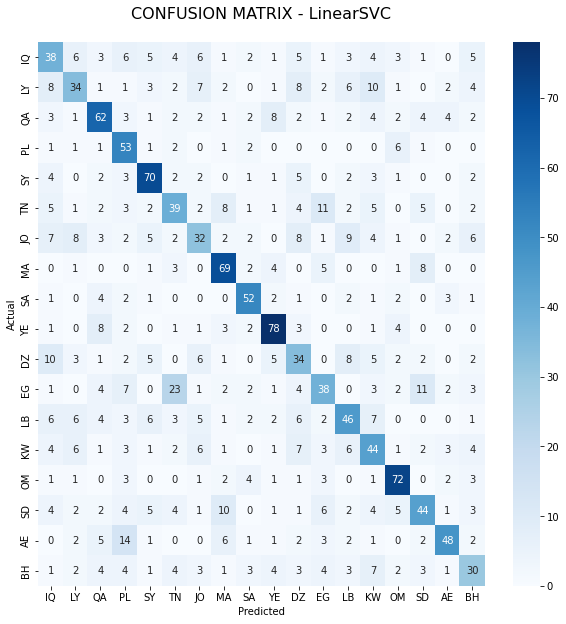

In [11]:
LSVC = LinearSVC(multi_class='ovr')
LSVC.fit(xtrain_tfv, y_train)
model_evaluation(LSVC, xtrain_tfv, y_train, xtest_tfv, y_test)

In [12]:
# Check 03
checker = dataset.sample(5)
sentences = list(checker.cleaned_tweet)
labels = list(checker.dialect)

predicted_labels = LSVC.predict(count_vectorizer.transform(sentences))

for i, sentence in enumerate(sentences):
  print("tweet: ", sentence)
  print("predicted label: ", predicted_labels[i])
  print("true label: ", labels[i])

tweet:  ماعندي سناب قسم بالله
predicted label:  QA
true label:  QA
tweet:  خسرناها اما نتيجه التسرع او التغابي
predicted label:  TN
true label:  TN
tweet:  اقل شي تخسروا اذا مقضينا لعب
predicted label:  LB
true label:  LB
tweet:  حتي الدنيا بقت غابه مش مبرر انك تبقي حيوان
predicted label:  EG
true label:  SD
tweet:  بغيتو ترتاحو السحالي ديرو فحالي اي وحده دخلت للتاق بلوك فنصف جبهتها ومندخلش ابدا جربوها وتشوفو الراحه
predicted label:  MA
true label:  MA


In [17]:
import pickle

# save the model for Deployment
filename = "MultinomialNB.pkl"  
with open(filename, 'wb') as file:
    pickle.dump((count_vectorizer, NB), file)

In [22]:
# load the model
with open('/content/MultinomialNB.pkl', 'rb') as f:
    loaded_count_vectorizer, loaded_clf = pickle.load(f)

In [23]:
print(loaded_clf.predict(loaded_count_vectorizer.transform(["كلش حلو"])))

['IQ']
